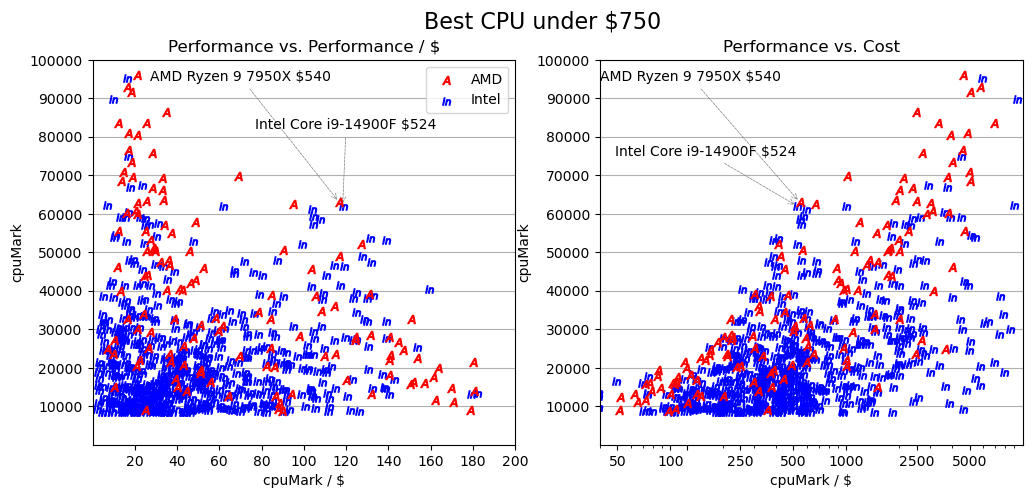

In [2]:
'''
a3_Robbins_000371194.py I, Jacob Robbins, student number 000371194, certify that this material is my original work.No other person's work has been used withoutdue acknowledgment and I have not made my work available to anyone else.
'''
import matplotlib.pyplot as plt
import numpy as np

#MAX_D value to be entered by user for annotations to be based of of max value, change filename as need be 
MAX_D, file_name = 750, "a3_multi_core_cpu_data.txt"


with open(file_name, "r") as file:
    data = file.read()
lines = data.strip().split('\n')
cpu_data = {'AMD': {'performance': [], 'cost': [], 'names': []}, 'Intel': {'performance': [], 'cost': [], 'names': []}}
for line in lines:
    if line.startswith("AMD") or line.startswith("Intel"):
        line_split = line.split()
        if line_split[-1] != "NA":
            m, performance, cost = line_split[0], int(line_split[-2].replace(",", "")), float(line_split[-1].replace("$", "").replace("*", "").replace(",", ""))
            cpu_data[m]['performance'].append(performance)
            cpu_data[m]['cost'].append(cost)
            cpu_name = ' '.join(line_split[:4]).split("(")[0] if m == 'AMD' else ' '.join(line_split[:3])
            cpu_data[m]['names'].append(cpu_name)
            
            
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Best CPU under ${}".format(MAX_D), fontsize=16)

for m in cpu_data.keys():
    ratio = np.array(cpu_data[m]['performance']) / np.array(cpu_data[m]['cost'])
    ind = np.where(np.array(cpu_data[m]['cost']) <= MAX_D)[0]
    best_index = ind[np.argmax(np.array(cpu_data[m]['performance'])[ind])] if ind.size > 0 else None
    color, style = 'red' if m == 'AMD' else 'blue', "$A$" if m == 'AMD' else "$in$"
    axs[0].scatter(ratio, cpu_data[m]['performance'], label=m, color=color, marker=style, zorder=100 if m == 'AMD' else 2, linewidth=0.8)
    axs[1].scatter(cpu_data[m]['cost'], cpu_data[m]['performance'], label=m, color=color, marker=style, zorder=100 if m == 'AMD' else 2, linewidth=0.8)
    axs[1].set_xscale('log')
    axs[1].set_xticks([50, 100, 125, 250, 500, 1000, 2500, 5000])
    axs[1].set_xticklabels(['50', '100', '', '250', '500', '1000', '2500', '5000'])
    axs[1].set_xlim(39.7, 10000)
    axs[1].set_title('Performance vs. Cost')
    axs[1].set_ylim(0, 100000)
    
    
    if best_index is not None:
        x, y = (0.35, 0.955) if m == 'AMD' else (0.6, 0.83)
        axs[0].annotate(f'{cpu_data[m]["names"][best_index]} ${int(cpu_data[m]["cost"][best_index])}',
                        xy=(ratio[best_index], cpu_data[m]['performance'][best_index]),
                        xycoords='data', xytext=(x, y), textcoords='axes fraction',
                        ha='center', va='center', arrowprops=dict(arrowstyle='->', ls='dashed', lw=0.5, color='grey'))
        x_text = 0.25 if m == 'Intel' else 0.215
        axs[1].annotate(f'{cpu_data[m]["names"][best_index]} ${int(cpu_data[m]["cost"][best_index])}',
                        xy=(cpu_data[m]["cost"][best_index], cpu_data[m]['performance'][best_index]),
                        xycoords='data', xytext=(x_text, 0.76 if m == 'Intel' else 0.955), textcoords='axes fraction',
                        ha='center', va='center', arrowprops=dict(arrowstyle='->', ls='dashed', lw=0.5, color='grey'))


for ax in axs:
    ax.set_xlabel('cpuMark / $')
    ax.set_ylabel('cpuMark')
    ax.set_yticks(np.arange(10000, 100001, 10000))
    ax.grid(axis='y', linestyle='-', zorder=-1)
    
axs[0].set_xticks(np.arange(20, 201, 20))
axs[0].legend()
axs[0].set_ylim(0, 100000)
axs[0].set_xlim(0, 200)
axs[0].set_title('Performance vs. Performance / $')

plt.show()
